# 前処理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#scvファイルの読み込み
livestock = pd.read_csv("../data/livestock.csv")
cultured = pd.read_csv("../data/cultured.csv")

In [3]:
data_pre = pd.concat([livestock,cultured],sort=False)
data = data_pre.reset_index(drop=True)

In [4]:
# 新しい説明変数を作成する

#一人当たり支援額
data["一人当たり支援額"] = round(data["支援総額"]/(data["支援者数"]+1))
#最高額支援ダミー:最高支援額と支援額上限が一致するか 0:不一致 1:一致
data["最高額支援ダミー"] = 0
data.loc[data['最高支援額']==data['支援額上限'],'最高額支援ダミー'] = 1
#最低額返礼品ダミー:支援額下限と返礼品ありの下限が一致するか　0:不一致　1:一致
data["最低額返礼品ダミー"] = 0
data.loc[data['支援額下限']==data['返礼品ありの下限'],'最低額返礼品ダミー'] = 1
#自然災害ダミー:災害を示すような言葉が含まれているか
data["自然災害ダミー"] = 0
for i in range(len(data)):
    if "震災" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1
    elif "豪雨" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1
    elif "台風" in data["プロジェクト名"][i]:
        data["自然災害ダミー"][i] = 1

#target値を作成　0:失敗　1:成功
data["achievement"] = data["支援総額"] // data["目標金額"]
data["target"] = 0
data.loc[data['achievement']>=1,'target'] = 1

<ipython-input-4-766776659890>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["自然災害ダミー"][i] = 1
<ipython-input-4-766776659890>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["自然災害ダミー"][i] = 1
<ipython-input-4-766776659890>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["自然災害ダミー"][i] = 1


In [5]:
delate_col = ["プロジェクト名","URL","CFP","産業","achievement"]
data = data.drop(columns=delate_col)

In [6]:
data.head()

,支援総額,目標金額,支援者数,画像数,動画数,文字数,活動報告回数,リターン種類数,最高支援額,支援額上限,支援額下限,最低支援額,返礼品ありの下限,一人当たり支援額,最高額支援ダミー,最低額返礼品ダミー,自然災害ダミー,target
0,1185000,1000000,71,8,0,2566,3,9,50000,50000,5000,5000,5000,16458.0,1,1,0,1
1,1382000,1000000,72,22,0,4010,5,12,100000,100000,3000,3000,3000,18932.0,1,1,0,1
2,1205000,1000000,91,9,1,4244,27,12,100000,100000,5000,5000,5000,13098.0,1,1,0,1
3,865000,600000,79,10,0,3500,13,5,10000,15000,5000,5000,10000,10812.0,0,0,0,1
4,1619000,1000000,116,18,0,3457,17,6,100000,300000,3000,3000,10000,13838.0,0,0,1,1


In [7]:
livestock = data[:109]
cultured = data[109:]

# 耕種

#### target

<AxesSubplot:xlabel='target', ylabel='count'>

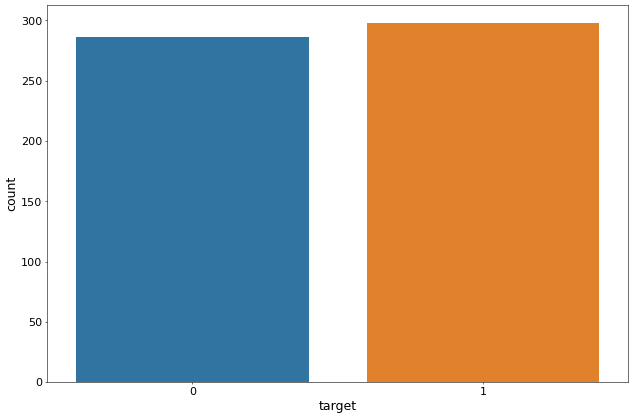

In [8]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.xlabel('target',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.countplot(x="target",data=cultured)

In [9]:
success = cultured["target"].sum() / len(cultured["target"])
print("成功割合:{}".format(success))

成功割合:0.5102739726027398


#### 目標金額

In [10]:
print("max:{} min:{}".format(cultured["目標金額"].max(),cultured["目標金額"].min()))

max:30000000 min:10000


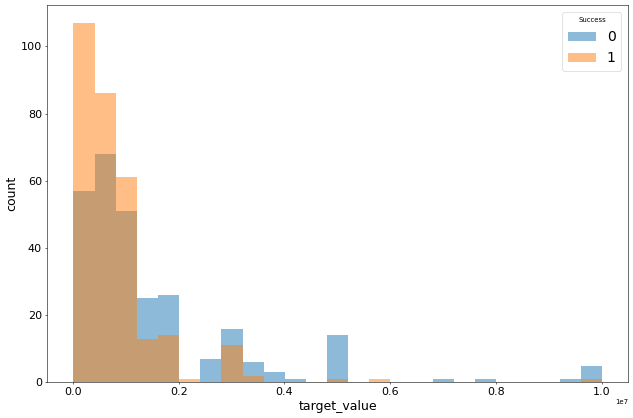

In [11]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'目標金額'],range=(10000,10000000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'目標金額'],range=(10000,10000000),bins=25,alpha=0.5,label='1')
plt.xlabel('target_value',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [12]:
#外れ値があるので平均は不適切かも
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'目標金額'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'目標金額'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'目標金額'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'目標金額'].median()))

成功グループの平均:821582.7315436242
失敗グループの平均:1847955.0314685316
成功グループの中央値:500000.0
失敗グループの中央値:1000000.0


#### 支援者数

In [13]:
print("max:{} min:{}".format(cultured["支援者数"].max(),cultured["支援者数"].min()))

max:1163 min:0


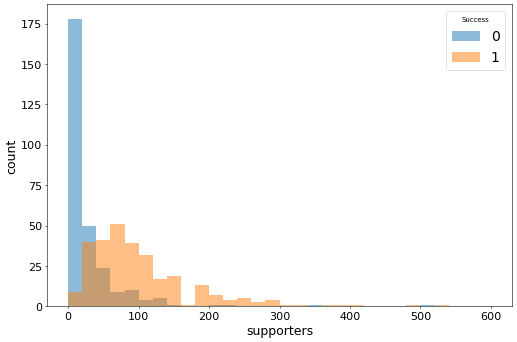

In [14]:
fig = plt.figure(figsize=(12, 8), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'支援者数'],range=(0,600),bins=30,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'支援者数'],range=(0,600),bins=30,alpha=0.5,label='1')
plt.xlabel('supporters',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [15]:
#外れ値があるので平均は不適切かも
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'支援者数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'支援者数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'支援者数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'支援者数'].median()))

成功グループの平均:117.88926174496645
失敗グループの平均:31.03146853146853
成功グループの中央値:85.5
失敗グループの中央値:13.5


#### 画像数

In [16]:
print("max:{} min:{}".format(cultured["画像数"].max(),cultured["画像数"].min()))

max:67 min:0


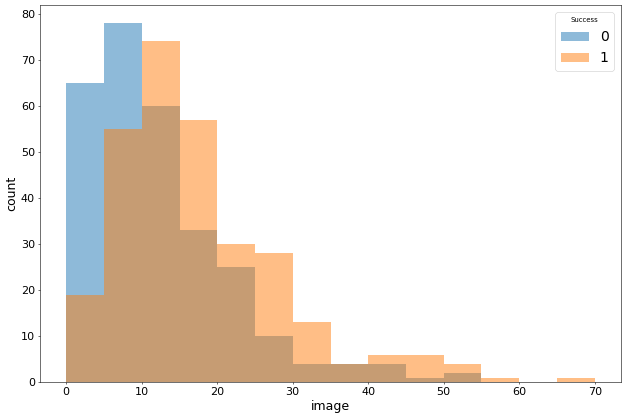

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'画像数'],range=(0,70),bins=14,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'画像数'],range=(0,70),bins=14,alpha=0.5,label='1')
plt.xlabel('image',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [18]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'画像数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'画像数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'画像数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'画像数'].median()))

成功グループの平均:17.238255033557046
失敗グループの平均:11.43006993006993
成功グループの中央値:15.0
失敗グループの中央値:9.5


#### 動画数

In [19]:
print("max:{} min:{}".format(cultured["動画数"].max(),cultured["動画数"].min()))

max:6 min:0


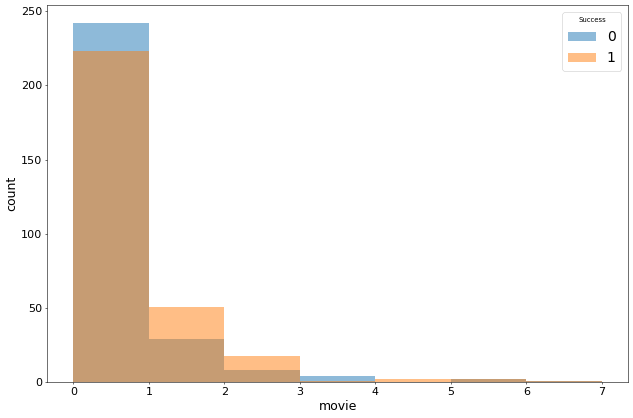

In [20]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'動画数'],range=(0,7),bins=7,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'動画数'],range=(0,7),bins=7,alpha=0.5,label='1')
plt.xlabel('movie',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [21]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'動画数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'動画数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'動画数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'動画数'].median()))

成功グループの平均:0.3825503355704698
失敗グループの平均:0.25524475524475526
成功グループの中央値:0.0
失敗グループの中央値:0.0


In [22]:
print("動画ありグループの成功率:{}".format(cultured.loc[cultured['動画数']>=1,'target'].mean()))
print("動画なしグループの成功率:{}".format(cultured.loc[cultured['動画数']==0,'target'].mean()))

動画ありグループの成功率:0.6302521008403361
動画なしグループの成功率:0.47956989247311826


#### 文字数

In [23]:
print("max:{} min:{}".format(cultured["文字数"].max(),cultured["文字数"].min()))

max:20054 min:378


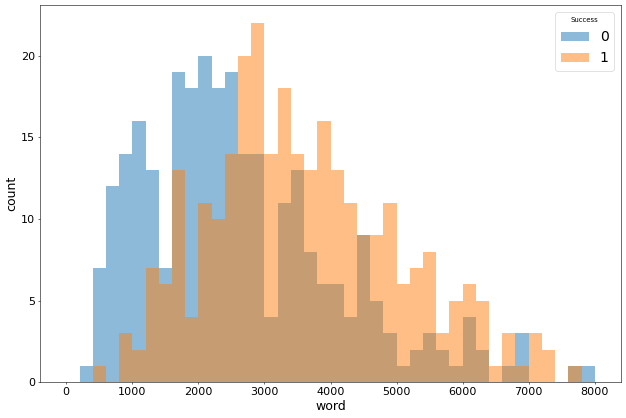

In [24]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'文字数'],range=(0,8000),bins=40,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'文字数'],range=(0,8000),bins=40,alpha=0.5,label='1')
plt.xlabel('word',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [25]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'文字数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'文字数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'文字数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'文字数'].median()))

成功グループの平均:3777.8959731543623
失敗グループの平均:2737.7272727272725
成功グループの中央値:3441.5
失敗グループの中央値:2375.5


#### 活動報告回数

In [26]:
print("max:{} min:{}".format(cultured["活動報告回数"].max(),cultured["活動報告回数"].min()))

max:99 min:0


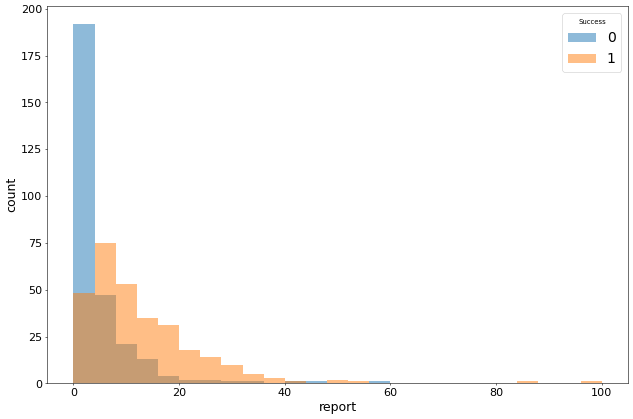

In [27]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'活動報告回数'],range=(0,100),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'活動報告回数'],range=(0,100),bins=25,alpha=0.5,label='1')
plt.xlabel('report',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [28]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'活動報告回数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'活動報告回数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'活動報告回数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'活動報告回数'].median()))

成功グループの平均:12.224832214765101
失敗グループの平均:3.8286713286713288
成功グループの中央値:9.0
失敗グループの中央値:1.0


#### リターン種類数

In [29]:
print("max:{} min:{}".format(cultured["リターン種類数"].max(),cultured["リターン種類数"].min()))

max:49 min:0


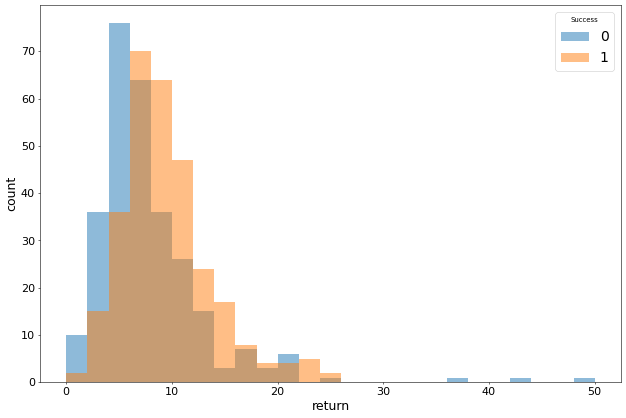

In [30]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'リターン種類数'],range=(0,50),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'リターン種類数'],range=(0,50),bins=25,alpha=0.5,label='1')
plt.xlabel('return',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [31]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'リターン種類数'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'リターン種類数'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'リターン種類数'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'リターン種類数'].median()))

成功グループの平均:8.953020134228188
失敗グループの平均:7.356643356643357
成功グループの中央値:8.0
失敗グループの中央値:6.0


#### 支援額上限

In [32]:
print("max:{} min:{}".format(cultured["支援額上限"].max(),cultured["支援額上限"].min()))

max:2900000 min:1200


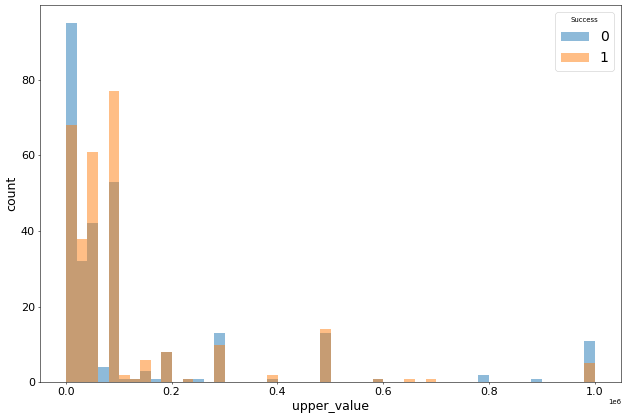

In [33]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'支援額上限'],range=(1000,1000000),bins=50,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'支援額上限'],range=(1000,1000000),bins=50,alpha=0.5,label='1')
plt.xlabel('upper_value',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [34]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'支援額上限'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'支援額上限'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'支援額上限'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'支援額上限'].median()))

成功グループの平均:128497.47651006712
失敗グループの平均:145444.26573426573
成功グループの中央値:50000.0
失敗グループの中央値:50000.0


#### 支援額下限

In [35]:
print("max:{} min:{}".format(cultured["支援額下限"].max(),cultured["支援額下限"].min()))

max:26000 min:500


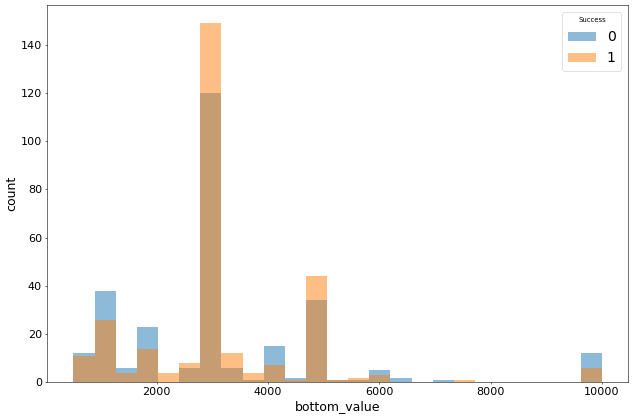

In [36]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'支援額下限'],range=(500,10000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'支援額下限'],range=(500,10000),bins=25,alpha=0.5,label='1')
plt.xlabel('bottom_value',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [37]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'支援額下限'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'支援額下限'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'支援額下限'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'支援額下限'].median()))

成功グループの平均:3281.1476510067114
失敗グループの平均:3278.877622377622
成功グループの中央値:3000.0
失敗グループの中央値:3000.0


#### 最高支援額

In [38]:
print("max:{} min:{}".format(cultured["最高支援額"].max(),cultured["最低支援額"].min()))

max:1200000 min:0


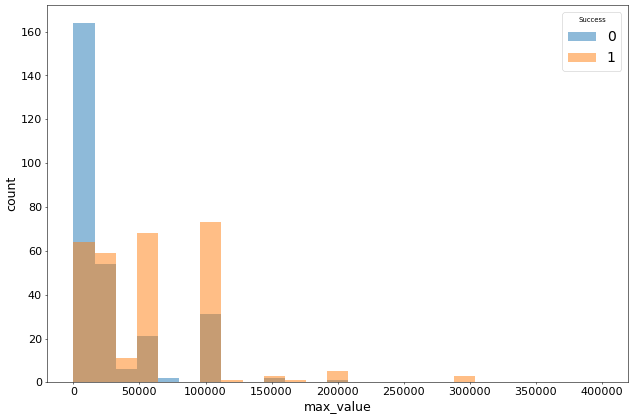

In [39]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='1')
plt.xlabel('max_value',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [40]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'最高支援額'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'最高支援額'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'最高支援額'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'最高支援額'].median()))

成功グループの平均:73999.95973154363
失敗グループの平均:38131.25874125874
成功グループの中央値:50000.0
失敗グループの中央値:11000.0


#### 最低支援額

In [41]:
print("max:{} min:{}".format(cultured["最低支援額"].max(),cultured["最低支援額"].min()))

max:50000 min:0


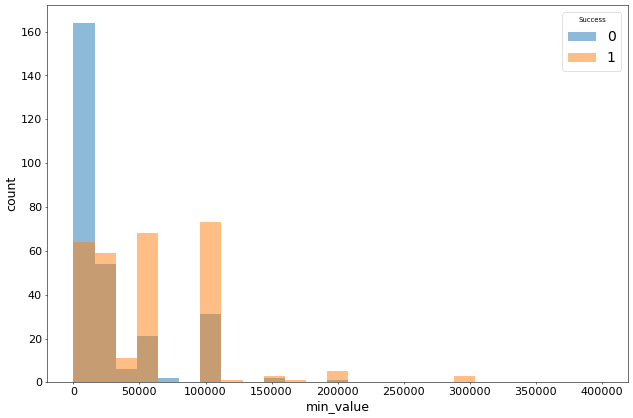

In [42]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'最高支援額'],range=(0,400000),bins=25,alpha=0.5,label='1')
plt.xlabel('min_value',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [43]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'最低支援額'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'最低支援額'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'最低支援額'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'最低支援額'].median()))

成功グループの平均:3405.308724832215
失敗グループの平均:3741.818181818182
成功グループの中央値:3000.0
失敗グループの中央値:3000.0


#### 一人当たり支援額

In [44]:
print("max:{} min:{}".format(cultured["一人当たり支援額"].max(),cultured["一人当たり支援額"].min()))

max:62531.0 min:0.0


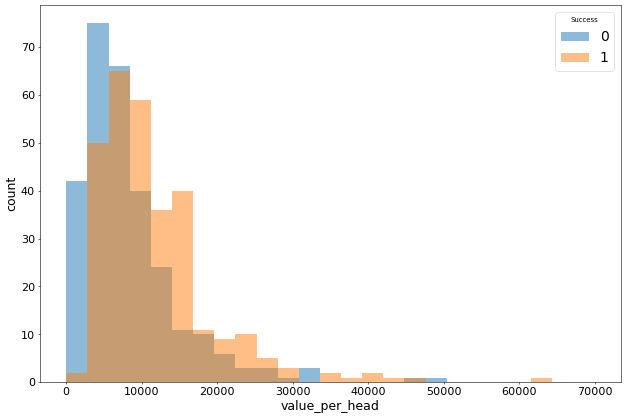

In [45]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'一人当たり支援額'],range=(0,70000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'一人当たり支援額'],range=(0,70000),bins=25,alpha=0.5,label='1')
plt.xlabel('value_per_head',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [46]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'一人当たり支援額'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'一人当たり支援額'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'一人当たり支援額'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'一人当たり支援額'].median()))

成功グループの平均:11714.557046979866
失敗グループの平均:8203.220279720279
成功グループの中央値:9757.0
失敗グループの中央値:6667.0


#### 返礼品ありの下限

In [47]:
print("max:{} min:{}".format(cultured["返礼品ありの下限"].max(),cultured["返礼品ありの下限"].min()))

max:50000 min:0


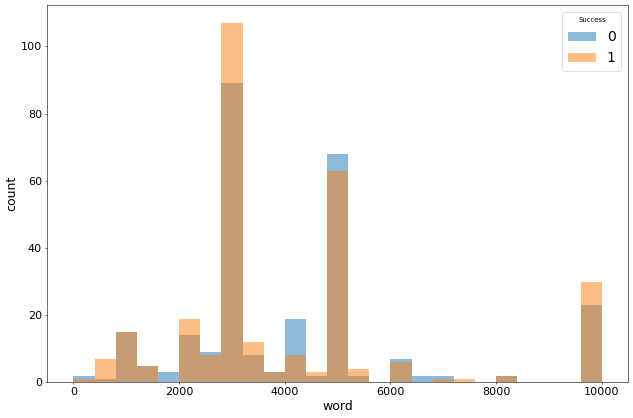

In [48]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
plt.hist(cultured.loc[cultured['target']==0,'返礼品ありの下限'],range=(0,10000),bins=25,alpha=0.5,label='0')
plt.hist(cultured.loc[cultured['target']==1,'返礼品ありの下限'],range=(0,10000),bins=25,alpha=0.5,label='1')
plt.xlabel('word',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [49]:
print("成功グループの平均:{}".format(cultured.loc[cultured['target']==1,'返礼品ありの下限'].mean()))
print("失敗グループの平均:{}".format(cultured.loc[cultured['target']==0,'返礼品ありの下限'].mean()))
print("成功グループの中央値:{}".format(cultured.loc[cultured['target']==1,'返礼品ありの下限'].median()))
print("失敗グループの中央値:{}".format(cultured.loc[cultured['target']==0,'返礼品ありの下限'].median()))

成功グループの平均:4251.919463087248
失敗グループの平均:4877.832167832168
成功グループの中央値:3000.0
失敗グループの中央値:3500.0


#### 最高額支援ダミー

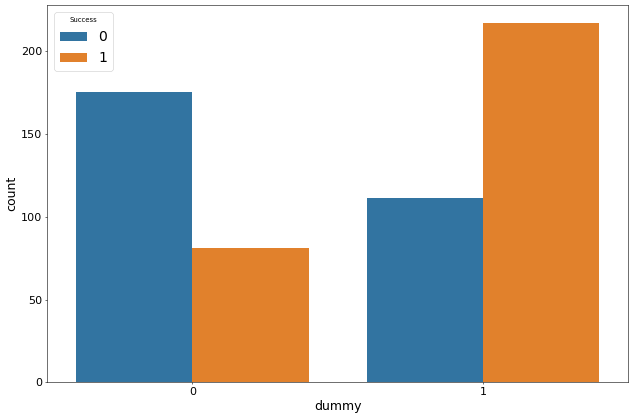

In [50]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='最高額支援ダミー',hue='target',data=cultured)
plt.xlabel('dummy',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [51]:
dummy = cultured["最高額支援ダミー"].sum() / len(cultured["最高額支援ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.5616438356164384


In [52]:
print("成功グループの割合:{}".format(cultured.loc[cultured['target']==1,'最高額支援ダミー'].sum() / len(cultured.loc[cultured['target']==1])))
print("失敗グループの割合:{}".format(cultured.loc[cultured['target']==0,'最高額支援ダミー'].sum() / len(cultured.loc[cultured['target']==0])))

成功グループの割合:0.7281879194630873
失敗グループの割合:0.3881118881118881


#### 最低額返礼品ダミー

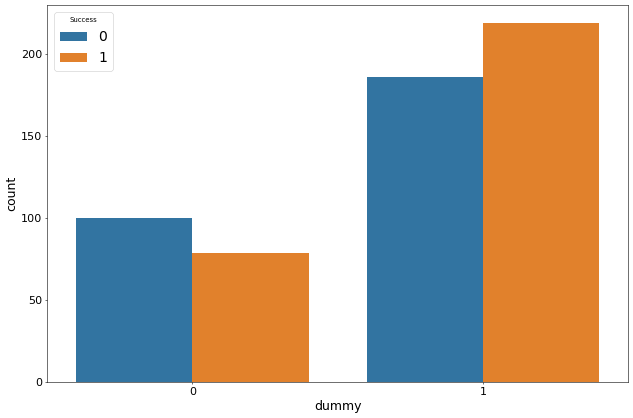

In [53]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='最低額返礼品ダミー',hue='target',data=cultured)
plt.xlabel('dummy',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [54]:
dummy = cultured["最低額返礼品ダミー"].sum() / len(cultured["最低額返礼品ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.6934931506849316


In [55]:
print("成功グループの割合:{}".format(cultured.loc[cultured['target']==1,'最低額返礼品ダミー'].sum() / len(cultured.loc[cultured['target']==1])))
print("失敗グループの割合:{}".format(cultured.loc[cultured['target']==0,'最低額返礼品ダミー'].sum() / len(cultured.loc[cultured['target']==0])))

成功グループの割合:0.7348993288590604
失敗グループの割合:0.6503496503496503


#### 自然災害ダミー

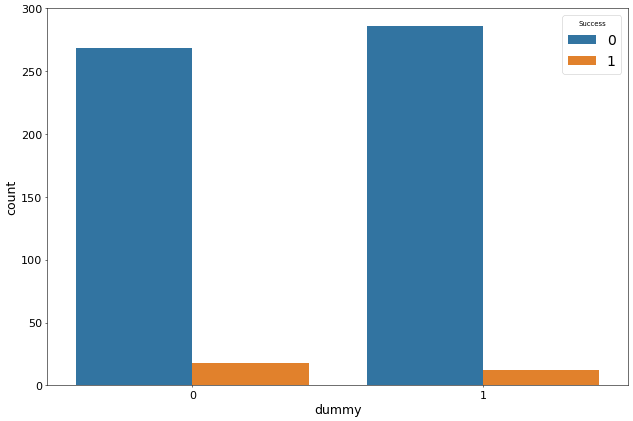

In [56]:
fig = plt.figure(figsize=(15, 10), dpi=50)
ax = fig.add_subplot()
sns.countplot(x='target',hue='自然災害ダミー',data=cultured)
plt.xlabel('dummy',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Success',fontsize=20)

In [57]:
dummy = cultured["自然災害ダミー"].sum() / len(cultured["自然災害ダミー"])
print("ダミー変数が1になる割合:{}".format(dummy))

ダミー変数が1になる割合:0.05136986301369863


In [58]:
print("災害グループの成功率:{}".format(cultured.loc[cultured['自然災害ダミー']==1,'target'].mean()))
print("非災害グループの成功率:{}".format(cultured.loc[cultured['自然災害ダミー']==0,'target'].mean()))

災害グループの成功率:0.4
非災害グループの成功率:0.516245487364621
